In [1]:
%matplotlib inline
from ggplot import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import csv
from pandas import DataFrame
import numpy as np

from pymongo import MongoClient, ASCENDING, DESCENDING
from bson import Code

In [2]:
client = MongoClient()
anycast = client.anycast_monitoring

## Shorter IPv6 - How different?

In [3]:
# where_query = """
# function() {
#     if(this.path4.length > this.path6.length ) {
#         return true;
#     } else {
#         return false;
#     }
# }
# """

# reducer = Code("""
#     function(obj, prev) {
#         prev.diff.push(obj.path4.length - obj.path6.length);
#     }
# """)

# container = {}
# root_list = 'acdfijklm'

# fig, axes = plt.subplots(nrows=9, ncols=1, sharey=True)
   
# for index, root in enumerate(root_list):
#     coll = anycast['{}_root'.format(root)]
#     res = coll.group(key={'timestamp':1}, condition={'$where': where_query}, initial={'diff': []}, reduce=reducer)

#     container[root] = DataFrame(res)
#     container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
#     container[root] = container[root].set_index(['timestamp'])

#     # unpack the list of differences
#     diff = DataFrame()

#     for item in container[root].iterrows():
#         s = DataFrame({item[0]: item[1]['diff']})
#         diff = pd.concat([diff, s], axis=1)
    
#     # find the mean
#     diff_list = list()
#     for item in container[root].iterrows():
#         diff_list = diff_list + item[1]['diff']
    
#     diff_df = DataFrame(diff_list)
#     mean = diff_df.mean()
    
#     # plot
#     diff.plot.box(ax=axes[index], figsize=(14,14), ylim=(0.5,5))
#     axes[index].axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))
    
#     n = 6

#     axes[index].text(0.5, 0.8, '{}-Root'.format(root.upper()), horizontalalignment='center', verticalalignment='center', transform= axes[index].transAxes, fontsize=12, bbox={'facecolor':'white', 'pad':5})
#     axes[index].grid(True)

#     ticks = axes[index].xaxis.get_ticklocs()
#     ticklabels = [l.get_text().split(' ')[0] for l in axes[index].xaxis.get_ticklabels()]
#     axes[index].xaxis.set_ticks(ticks[::n])
#     axes[index].xaxis.set_ticklabels(ticklabels[::n])

#     start, end = axes[index].get_ylim()
#     axes[index].yaxis.set_ticks(np.arange(start + 0.5, end + 0.5, 1))

# print('finish')
# plt.tight_layout()
# plt.show()
# print('finish')

a-Root


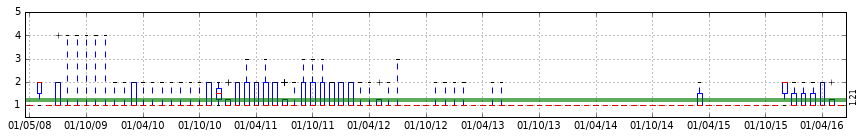

c-Root


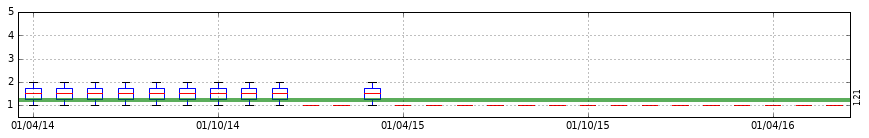

d-Root


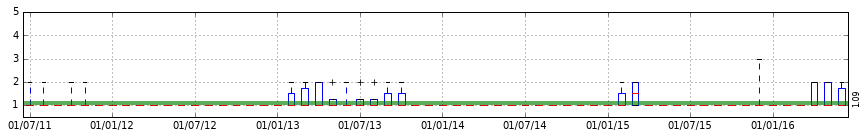

f-Root


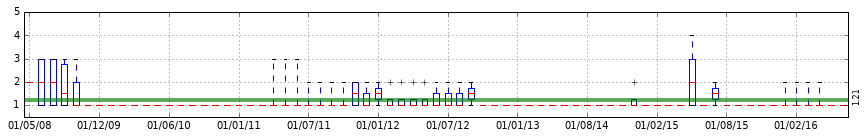

i-Root


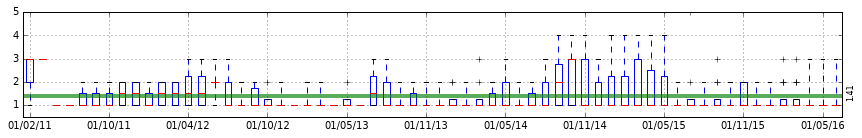

j-Root


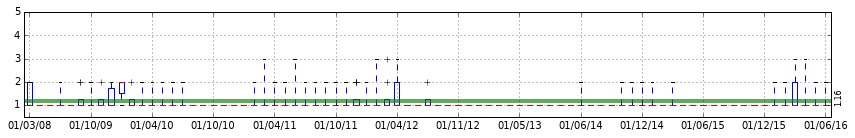

k-Root


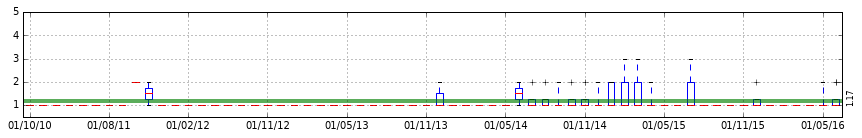

l-Root


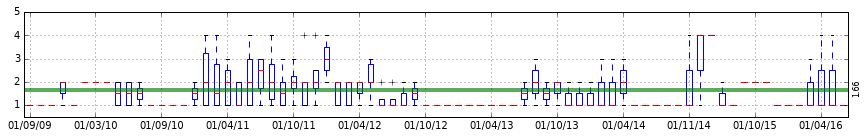

m-Root


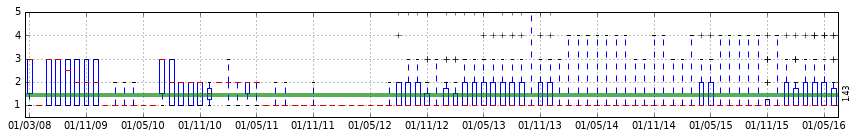

In [4]:
where_query = """
function() {
    if(this.path4.length > this.path6.length ) {
        return true;
    } else {
        return false;
    }
}
"""

reducer = Code("""
    function(obj, prev) {
        prev.diff.push(obj.path4.length - obj.path6.length);
    }
""")


def format_date(dt):
    try:
        dt = dt.split(' ')[0]
        year, month, day = dt.split('-')
        returned = day + '/' + month + '/' + year[2:]
    except ValueError:
        returned = dt
        print('error: {}'.format(dt))
    return returned


container = {}
root_list = 'acdfijklm'
  
for root in root_list:
    fig, axes = plt.subplots()
    
    coll = anycast['{}_root'.format(root)]
    res = coll.group(key={'timestamp':1}, condition={'$where': where_query}, initial={'diff': []}, reduce=reducer)

    container[root] = DataFrame(res)
    container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
    container[root] = container[root].set_index(['timestamp'])

    # unpack the list of differences
    diff = DataFrame()

    for item in container[root].iterrows():
        s = DataFrame({item[0]: item[1]['diff']})
        diff = pd.concat([diff, s], axis=1)
    
    # find the mean
    diff_list = list()
    for item in container[root].iterrows():
        diff_list = diff_list + item[1]['diff']
    
    diff_df = DataFrame(diff_list)
    mean = diff_df.mean()

    # plot
    plot = diff.plot.box(ax=axes, figsize=(12,2), ylim=(0.5,5))
    axes.axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))

    # plot IPv4 path length mean 
    axes.axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))
    axes.text(1.01, 
                 mean.get_values()[0] / 6, # normalize 
                 '{0:.2f}'.format(mean.get_values()[0]), 
                 fontsize=8, horizontalalignment='center', 
                 verticalalignment='center', 
                 transform= axes.transAxes, 
                 rotation=90)    
        
    n = 6

    ticks = axes.xaxis.get_ticklocs()
    ticklabels = [format_date(l.get_text()) for l in axes.xaxis.get_ticklabels()]
    axes.xaxis.set_ticks(ticks[::n])
    axes.xaxis.set_ticklabels(ticklabels[::n])

    start, end = axes.get_ylim()
    axes.yaxis.set_ticks(np.arange(start + 0.5, end + 0.5, 1))
    
    axes.grid(True)

    print('{}-Root'.format(root))
    plt.tight_layout()
    plt.show()

## Shorter IPv4 - How different?

In [5]:
# where_query = """
# function() {
#     if(this.path4.length < this.path6.length ) {
#         return true;
#     } else {
#         return false;
#     }
# }
# """

# reducer = Code("""
#     function(obj, prev) {
#         prev.diff.push(obj.path6.length - obj.path4.length);
#     }
# """)

# container = {}
# root_list = 'acdfijklm'

# fig, axes = plt.subplots(nrows=9, ncols=1, sharey=True)
   
# for index, root in enumerate(root_list):
#     coll = anycast['{}_root'.format(root)]
#     res = coll.group(key={'timestamp':1}, condition={'$where': where_query}, initial={'diff': []}, reduce=reducer)

#     container[root] = DataFrame(res)
#     container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
#     container[root] = container[root].set_index(['timestamp'])

#     # unpack list of differences
#     diff = DataFrame()

#     for item in container[root].iterrows():
#         s = DataFrame({item[0]: item[1]['diff']})
#         diff = pd.concat([diff, s], axis=1)

#     # find the mean
#     diff_list = list()
#     for item in container[root].iterrows():
#         diff_list = diff_list + item[1]['diff']
    
#     diff_df = DataFrame(diff_list)
#     mean = diff_df.mean()
    
#     # plot
#     diff.plot.box(ax=axes[index], figsize=(14,14), ylim=(0.5,5))
#     axes[index].axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))    
    
    
#     n = 6

#     axes[index].text(0.5, 0.8, '{}-Root'.format(root.upper()), horizontalalignment='center', verticalalignment='center', transform= axes[index].transAxes, fontsize=12, bbox={'facecolor':'white', 'pad':5})
#     axes[index].grid(True)

#     ticks = axes[index].xaxis.get_ticklocs()
#     ticklabels = [l.get_text().split(' ')[0] for l in axes[index].xaxis.get_ticklabels()]
#     axes[index].xaxis.set_ticks(ticks[::n])
#     axes[index].xaxis.set_ticklabels(ticklabels[::n])

#     start, end = axes[index].get_ylim()
#     axes[index].yaxis.set_ticks(np.arange(start + 0.5, end + 0.5, 1))

# print('finish')
# plt.tight_layout()
# plt.show()
# print('finish')

a-Root


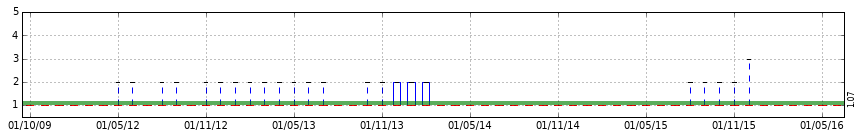

c-Root


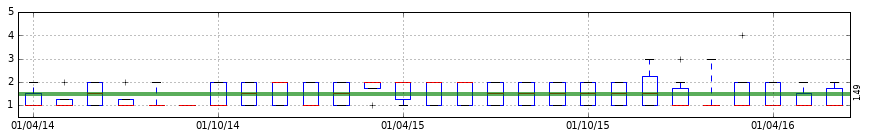

d-Root


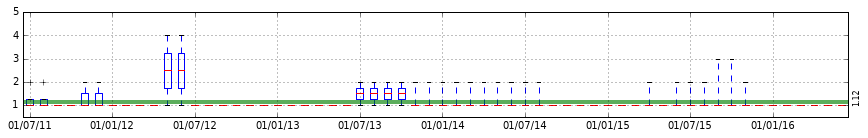

f-Root


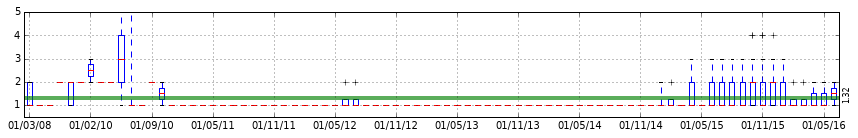

i-Root


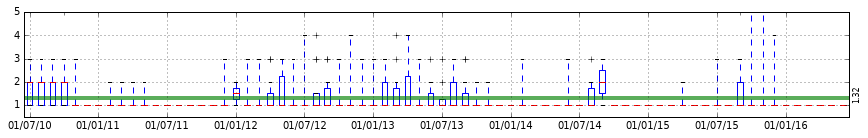

j-Root


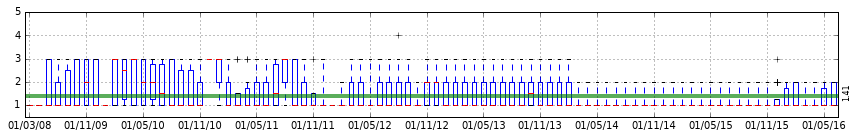

k-Root


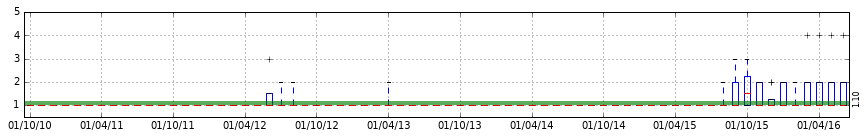

l-Root


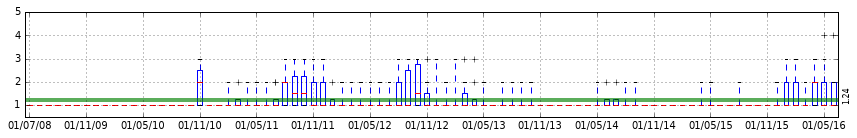

m-Root


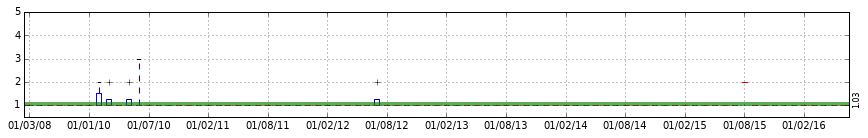

In [6]:
where_query = """
function() {
    if(this.path4.length < this.path6.length ) {
        return true;
    } else {
        return false;
    }
}
"""

reducer = Code("""
    function(obj, prev) {
        prev.diff.push(obj.path6.length - obj.path4.length);
    }
""")

def format_date(dt):
    try:
        dt = dt.split(' ')[0]
        year, month, day = dt.split('-')
        returned = day + '/' + month + '/' + year[2:]
    except ValueError:
        returned = dt
        print('error: {}'.format(dt))
    return returned


container = {}
root_list = 'acdfijklm'
   
for index, root in enumerate(root_list):
    fig, axes = plt.subplots()
    coll = anycast['{}_root'.format(root)]
    res = coll.group(key={'timestamp':1}, condition={'$where': where_query}, initial={'diff': []}, reduce=reducer)

    container[root] = DataFrame(res)
    container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
    container[root] = container[root].set_index(['timestamp'])

    # unpack list of differences
    diff = DataFrame()

    for item in container[root].iterrows():
        s = DataFrame({item[0]: item[1]['diff']})
        diff = pd.concat([diff, s], axis=1)

    # find the mean
    diff_list = list()
    for item in container[root].iterrows():
        diff_list = diff_list + item[1]['diff']
    
    diff_df = DataFrame(diff_list)
    mean = diff_df.mean()
    
    # plot
    diff.plot.box(ax=axes, figsize=(12,2), ylim=(0.5,5))
    axes.axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))    
    
    # plot IPv4 path length mean 
    axes.axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))
    axes.text(1.01, 
                 mean.get_values()[0] / 6, # normalize 
                 '{0:.2f}'.format(mean.get_values()[0]), 
                 fontsize=8, horizontalalignment='center', 
                 verticalalignment='center', 
                 transform= axes.transAxes, 
                 rotation=90)    
    
    
    n = 6
    
    ticks = axes.xaxis.get_ticklocs()
    ticklabels = [format_date(l.get_text()) for l in axes.xaxis.get_ticklabels()]
    axes.xaxis.set_ticks(ticks[::n])
    axes.xaxis.set_ticklabels(ticklabels[::n])

    start, end = axes.get_ylim()
    axes.yaxis.set_ticks(np.arange(start + 0.5, end + 0.5, 1))
    axes.grid(True)


    print('{}-Root'.format(root))
    plt.tight_layout()
    plt.show()

## Same path length, how different?

finish


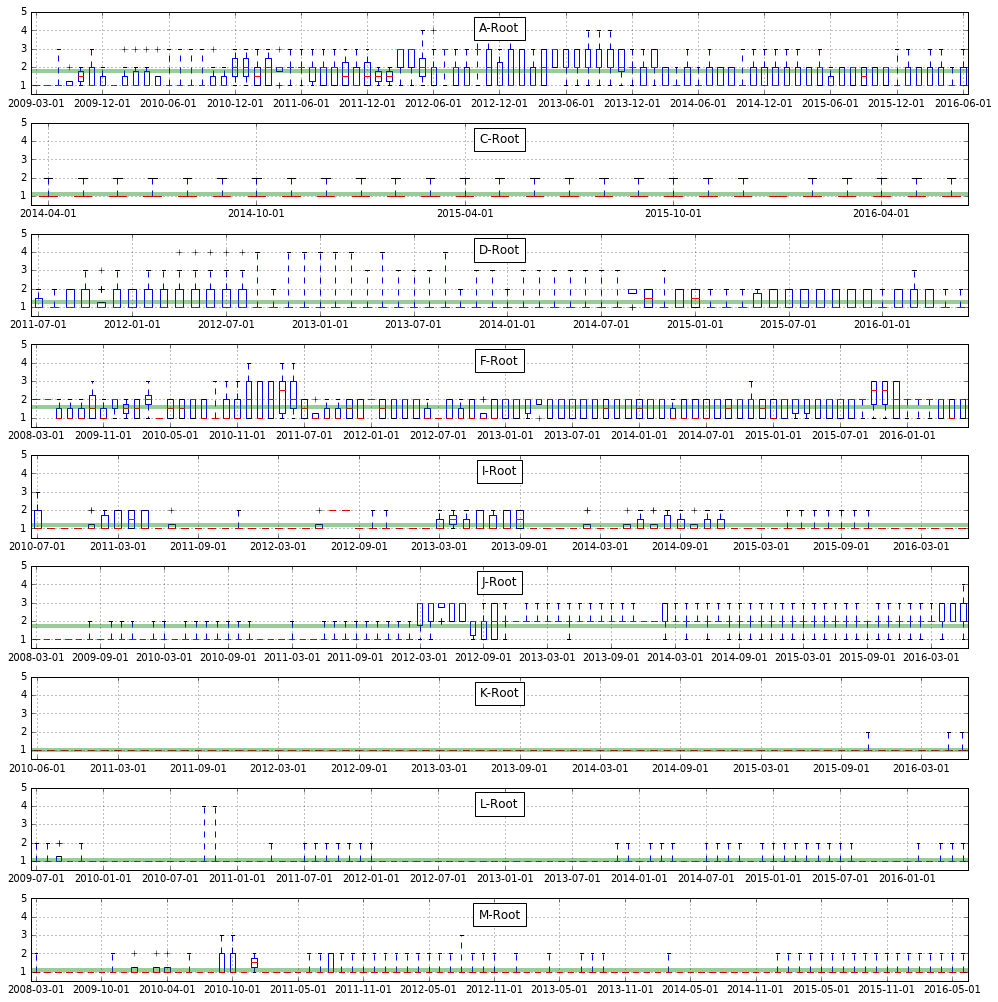

finish


In [14]:
where_query = """
function() {
    if(this.path4.length == this.path6.length ) {
        for(var i = 0; i < this.path4.length; i++) {
            if(this.path4[i] != this.path6[i]) {
                return true;
            }
        }
    }
    return false;
}
"""

reducer = Code("""
    function(obj, prev) {
        var counter = 0;
        for(var i = 0; i < obj.path4.length; i++) {
            if(obj.path4[i] != obj.path6[i]) {
                counter++;
            }
        }
        prev.diff.push(counter);
    }
""")

container = {}
root_list = 'acdfijklm'

fig, axes = plt.subplots(nrows=9, ncols=1, sharey=True)
   
for index, root in enumerate(root_list):
    coll = anycast['{}_root'.format(root)]
    res = coll.group(key={'timestamp':1}, condition={'$where': where_query}, initial={'diff': []}, reduce=reducer)

    container[root] = DataFrame(res)
    container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
    container[root] = container[root].set_index(['timestamp'])
    
    # unpack the list of differences
    diff = DataFrame()

    for item in container[root].iterrows():
        s = DataFrame({item[0]: item[1]['diff']})
        diff = pd.concat([diff, s], axis=1)

    # find the mean
    diff_list = list()
    for item in container[root].iterrows():
        diff_list = diff_list + item[1]['diff']
    
    diff_df = DataFrame(diff_list)
    mean = diff_df.mean()
    
    # plot
    diff.plot.box(ax=axes[index], figsize=(14,14), ylim=(0.5,5))
    axes[index].axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))
    
    n = 6

    axes[index].text(0.5, 0.8, '{}-Root'.format(root.upper()), horizontalalignment='center', verticalalignment='center', transform= axes[index].transAxes, fontsize=12, bbox={'facecolor':'white', 'pad':5})
    axes[index].grid(True)

    ticks = axes[index].xaxis.get_ticklocs()
    ticklabels = [l.get_text().split(' ')[0] for l in axes[index].xaxis.get_ticklabels()]
    axes[index].xaxis.set_ticks(ticks[::n])
    axes[index].xaxis.set_ticklabels(ticklabels[::n])

    start, end = axes[index].get_ylim()
    axes[index].yaxis.set_ticks(np.arange(start + 0.5, end + 0.5, 1))

print('finish')
plt.tight_layout()
plt.show()
print('finish')

a-Root


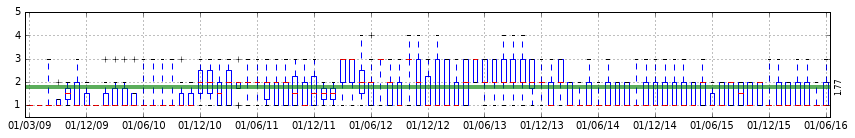

c-Root


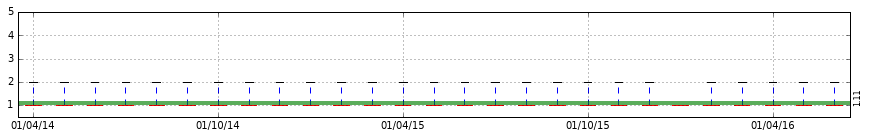

d-Root


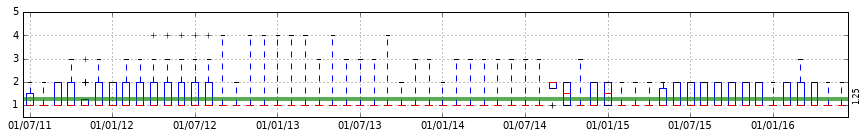

f-Root


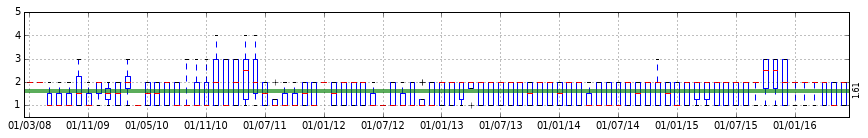

i-Root


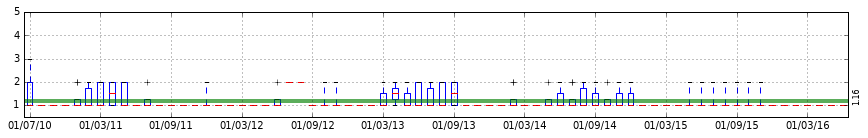

j-Root


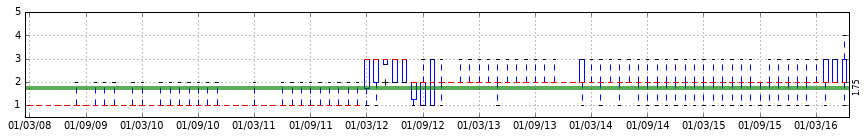

k-Root


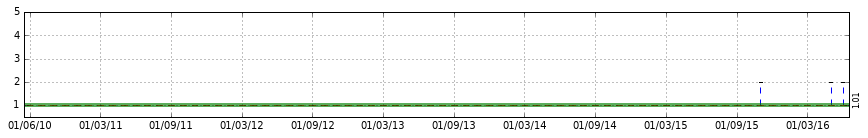

l-Root


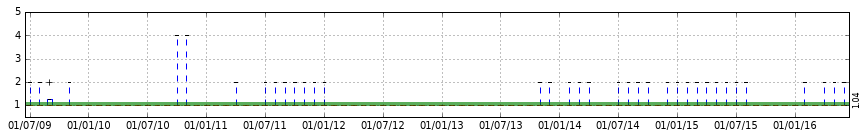

m-Root


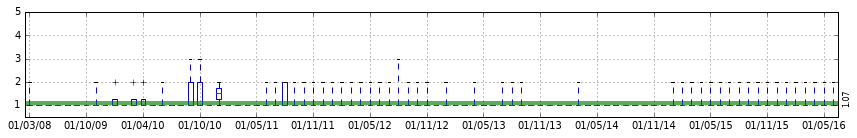

In [31]:
where_query = """
function() {
    if(this.path4.length == this.path6.length ) {
        for(var i = 0; i < this.path4.length; i++) {
            if(this.path4[i] != this.path6[i]) {
                return true;
            }
        }
    }
    return false;
}
"""

reducer = Code("""
    function(obj, prev) {
        var counter = 0;
        for(var i = 0; i < obj.path4.length; i++) {
            if(obj.path4[i] != obj.path6[i]) {
                counter++;
            }
        }
        prev.diff.push(counter);
    }
""")

def format_date(dt):
    try:
        dt = dt.split(' ')[0]
        year, month, day = dt.split('-')
        returned = day + '/' + month + '/' + year[2:]
    except ValueError:
        returned = dt
        print('error: {}'.format(dt))
    return returned

container = {}
root_list = 'acdfijklm'
   
for index, root in enumerate(root_list):
    fig, axes = plt.subplots()
    
    coll = anycast['{}_root'.format(root)]
    res = coll.group(key={'timestamp':1}, condition={'$where': where_query}, initial={'diff': []}, reduce=reducer)

    container[root] = DataFrame(res)
    container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
    container[root] = container[root].set_index(['timestamp'])
    
    # unpack the list of differences
    diff = DataFrame()

    for item in container[root].iterrows():
        s = DataFrame({item[0]: item[1]['diff']})
        diff = pd.concat([diff, s], axis=1)

    # find the mean
    diff_list = list()
    for item in container[root].iterrows():
        diff_list = diff_list + item[1]['diff']
    
    diff_df = DataFrame(diff_list)
    mean = diff_df.mean()
    
    # plot
    diff.plot.box(ax=axes, figsize=(12,2), ylim=(0.5,5))
    axes.axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))

    # plot IPv4 path length mean 
    axes.axhline(color='g', linewidth=4, alpha=0.4, y=float(mean))
    axes.text(1.01, 
                 mean.get_values()[0] / 6, # normalize 
                 '{0:.2f}'.format(mean.get_values()[0]), 
                 fontsize=8, horizontalalignment='center', 
                 verticalalignment='center', 
                 transform= axes.transAxes, 
                 rotation=90)    
     
    n = 6

    ticks = axes.xaxis.get_ticklocs()
    ticklabels = [format_date(l.get_text()) for l in axes.xaxis.get_ticklabels()]
    axes.xaxis.set_ticks(ticks[::n])
    axes.xaxis.set_ticklabels(ticklabels[::n])

    start, end = axes.get_ylim()
    axes.yaxis.set_ticks(np.arange(start + 0.5, end + 0.5, 1))
    axes.grid(True)

    print('{}-Root'.format(root))
    plt.tight_layout()
    plt.show()

## Composition: how many peers are identical, IPv4 shorter, IPv6 shorter, and similar path length but different path?

In [9]:
reducer = Code("""
    function(obj, prev) {
        if(obj.path4.length > obj.path6.length) {
            prev.ipv6shorter++;
        }
        else if(obj.path4.length < obj.path6.length) {
            prev.ipv4shorter++;
        }
        else if(obj.path4.length == obj.path6.length) {
            if(obj.path4.toString() == obj.path6.toString()) {
                prev.identical++;
            } else {
                prev.diff_path++;
            }
        }
    }
""")

coll = anycast['a_root']
res = coll.group(key={'timestamp':1}, 
                 condition={}, 
                 initial={'identical': 0, 'diff_path': 0, 'ipv4shorter': 0, 'ipv6shorter': 0}, 
                 reduce=reducer)

for item in res:
    print(item)

{'ipv4shorter': 0.0, 'diff_path': 0.0, 'timestamp': 1209600000.0, 'ipv6shorter': 1.0, 'identical': 0.0}
{'ipv4shorter': 0.0, 'diff_path': 0.0, 'timestamp': 1214870400.0, 'ipv6shorter': 3.0, 'identical': 0.0}
{'ipv4shorter': 0.0, 'diff_path': 1.0, 'timestamp': 1235865600.0, 'ipv6shorter': 3.0, 'identical': 0.0}
{'ipv4shorter': 0.0, 'diff_path': 1.0, 'timestamp': 1246406400.0, 'ipv6shorter': 24.0, 'identical': 0.0}
{'ipv4shorter': 0.0, 'diff_path': 10.0, 'timestamp': 1249084800.0, 'ipv6shorter': 15.0, 'identical': 0.0}
{'ipv4shorter': 0.0, 'diff_path': 4.0, 'timestamp': 1251763200.0, 'ipv6shorter': 22.0, 'identical': 0.0}
{'ipv4shorter': 1.0, 'diff_path': 2.0, 'timestamp': 1254355200.0, 'ipv6shorter': 22.0, 'identical': 0.0}
{'ipv4shorter': 0.0, 'diff_path': 7.0, 'timestamp': 1257033600.0, 'ipv6shorter': 18.0, 'identical': 0.0}
{'ipv4shorter': 0.0, 'diff_path': 3.0, 'timestamp': 1259625600.0, 'ipv6shorter': 24.0, 'identical': 0.0}
{'ipv4shorter': 0.0, 'diff_path': 1.0, 'timestamp': 12623

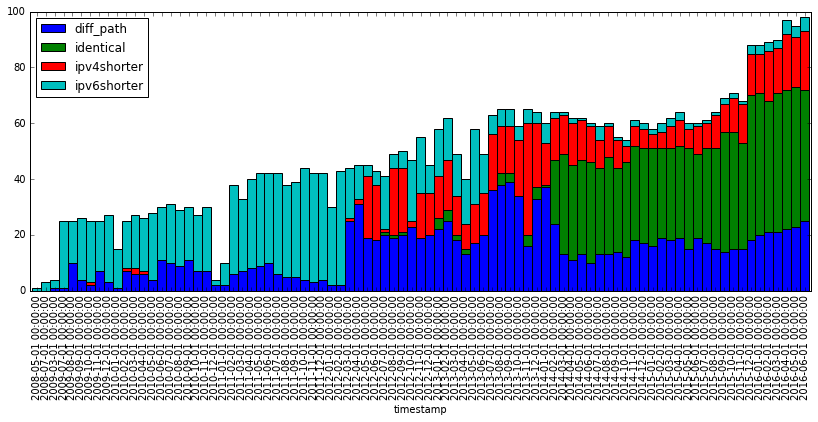

In [18]:
df = DataFrame(res)
df['timestamp'] = pd.to_datetime(df['timestamp'] * 1000000000)
df = df.set_index(['timestamp'])

df.plot.bar(stacked=True, figsize=(14,5), width=1.0)

plt.show()

finish


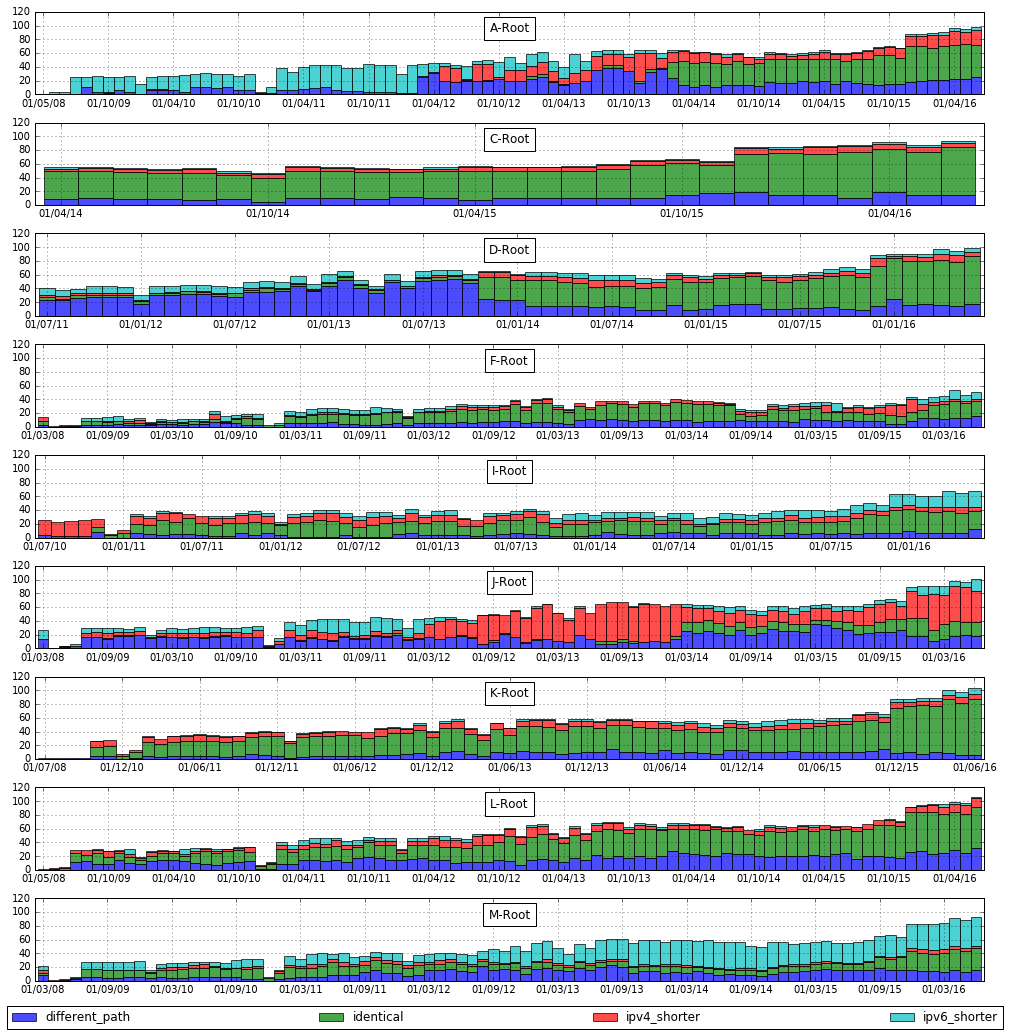

finish


In [3]:
root_list = 'acdfijklm'

reducer = Code("""
    function(obj, prev) {
        if(obj.path4.length > obj.path6.length) {
            prev.ipv6_shorter++;
        }
        else if(obj.path4.length < obj.path6.length) {
            prev.ipv4_shorter++;
        }
        else if(obj.path4.length == obj.path6.length) {
            if(obj.path4.toString() == obj.path6.toString()) {
                prev.identical++;
            } else {
                prev.different_path++;
            }
        }
    }
""")

def format_date(dt):
    dt = dt.split(' ')[0]
    year, month, day = dt.split('-')
    return day + '/' + month + '/' + year[2:]

container = {}
fig, axes = plt.subplots(nrows=9, ncols=1, sharey=True)

for index, root in enumerate(root_list):
    coll = anycast['{}_root'.format(root)]
    res = coll.group(key={'timestamp':1}, 
                 condition={}, 
                 initial={'identical': 0, 'different_path': 0, 'ipv4_shorter': 0, 'ipv6_shorter': 0}, 
                 reduce=reducer)

    container[root] = DataFrame(res)
    container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
    container[root] = container[root].set_index(['timestamp'])

    container[root].plot.bar(stacked=True, 
                             ax=axes[index], 
                             figsize=(14,14), 
                             width=1.0,
                             alpha=0.7,
                             xlim=(pd.Timestamp('2008-02-1'), pd.Timestamp('2016-06-01')))
    
    ## dummy
    dummy = DataFrame()
    
    n = 6

    axes[index].text(0.5, 0.8, '{}-Root'.format(root.upper()), horizontalalignment='center', verticalalignment='center', transform= axes[index].transAxes, fontsize=12, bbox={'facecolor':'white', 'pad':5})
    axes[index].grid(True)

    ticks = axes[index].xaxis.get_ticklocs()
    ticklabels = [format_date(l.get_text()) for l in axes[index].xaxis.get_ticklabels()]
    axes[index].xaxis.set_ticks(ticks[::n])
    axes[index].xaxis.set_ticklabels(ticklabels[::n], rotation=0)
    axes[index].set_xlabel('')
    axes[index].legend().set_visible(False)

print('finish')

plt.legend( loc = 'lower center', 
            bbox_to_anchor = (0, -0.03, 1, 1),
            bbox_transform = plt.gcf().transFigure, 
            ncol= 4,
            mode= 'expand')
plt.tight_layout()
plt.show()
print('finish')


## Normalized

finish


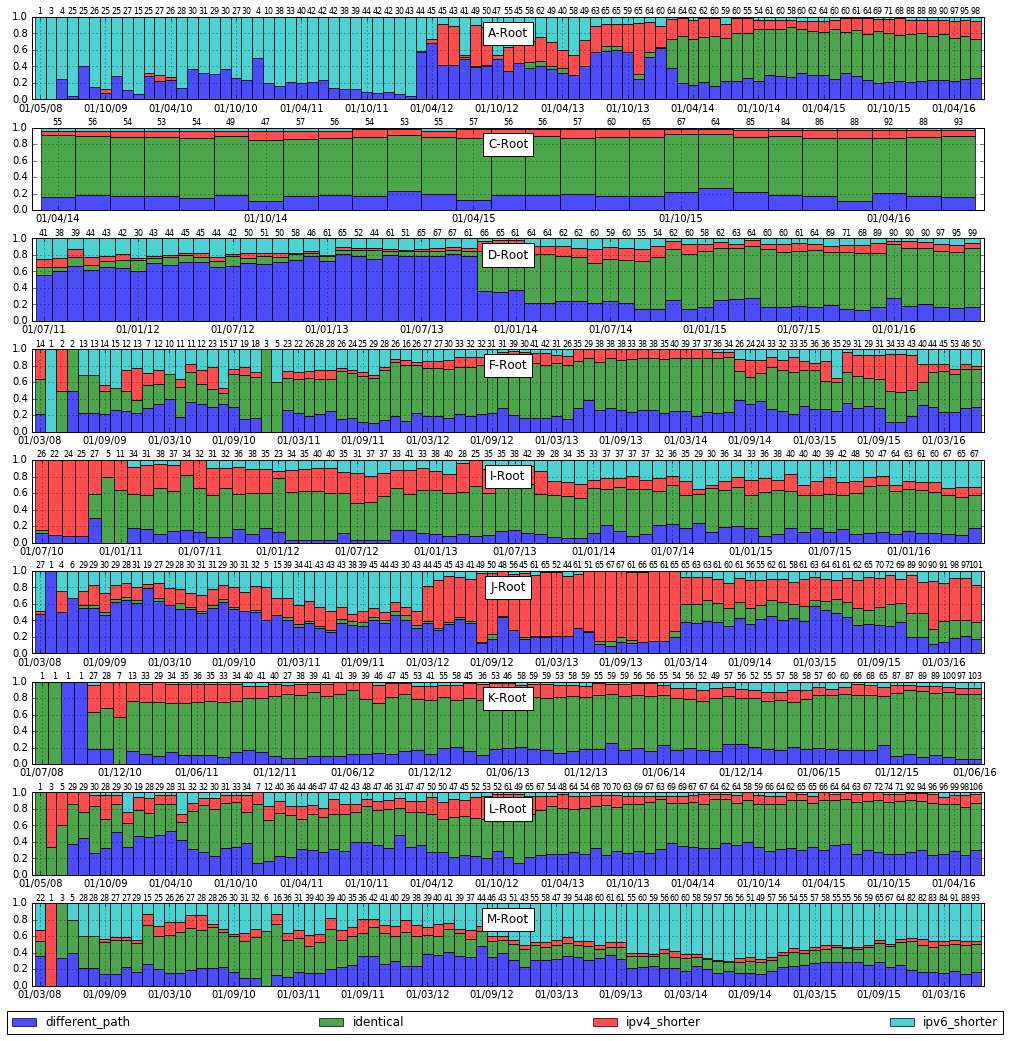

finish


In [115]:
root_list = 'acdfijklm'

reducer = Code("""
    function(obj, prev) {
        if(obj.path4.length > obj.path6.length) {
            prev.ipv6_shorter++;
        }
        else if(obj.path4.length < obj.path6.length) {
            prev.ipv4_shorter++;
        }
        else if(obj.path4.length == obj.path6.length) {
            if(obj.path4.toString() == obj.path6.toString()) {
                prev.identical++;
            } else {
                prev.different_path++;
            }
        }
    }
""")

def format_date(dt):
    try:
        dt = dt.split(' ')[0]
        year, month, day = dt.split('-')
        returned = day + '/' + month + '/' + year[2:]
    except ValueError:
        returned = dt
        print('error: {}'.format(dt))
    return returned

container = {}
fig, axes = plt.subplots(nrows=9, ncols=1, sharey=True)

for index, root in enumerate(root_list):
    coll = anycast['{}_root'.format(root)]
    res = coll.group(key={'timestamp':1}, 
                 condition={}, 
                 initial={'identical': 0, 'different_path': 0, 'ipv4_shorter': 0, 'ipv6_shorter': 0}, 
                 reduce=reducer)
    
    # normalise the timestamp
    container[root] = DataFrame(res)
    container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
    container[root] = container[root].set_index(['timestamp'])
    # insert dummy data to fill in time-gap
#     if container[root].index[0] > pd.datetime(2008,3,1):
#         temp_range = pd.date_range(pd.datetime(2008,2,1), container[root].index[0], freq='MS')
#         temp = DataFrame(0, index=temp_range, columns=['identical', 'ipv4_shorter', 'ipv6_shorter', 'different_path'])
#         container[root] = temp.append(container[root])
    
    # set timestamp as index
#     container[root].sort_index()
    
    for item in container[root].iterrows():
        total = item[1]['identical'] + item[1]['different_path'] + item[1]['ipv4_shorter'] + item[1]['ipv6_shorter']
        item[1]['identical'] = item[1]['identical'] / total
        item[1]['different_path'] = item[1]['different_path'] / total
        item[1]['ipv4_shorter'] = item[1]['ipv4_shorter'] / total
        item[1]['ipv6_shorter'] = item[1]['ipv6_shorter'] / total
        
    bars = container[root].plot.bar(stacked=True, 
                             ax=axes[index], 
                             figsize=(14,14), 
                             width=1.0,
                             alpha=0.7,
#                              xlim=(pd.Timestamp('2008-03-1'), pd.Timestamp('2016-06-01')),
                             ylim=(0,1))
   

    # display total of peers at the top of bins
    temp_set = set()
    for bar in bars.patches:
        temp_set.add(bar.get_x())
    temp_list = sorted(list(temp_set)) 
    
    for idx, item in enumerate(res):
        total = item['identical'] + item['ipv4_shorter'] + item['ipv6_shorter'] + item['different_path']
        axes[index].text(temp_list[idx] + 0.5, 
                         1.065, 
                         int(total), 
                         horizontalalignment='center', 
                         verticalalignment='center',
                         fontsize=8)
    
    n = 6

    axes[index].text(0.5, 0.8, '{}-Root'.format(root.upper()), horizontalalignment='center', verticalalignment='center', transform= axes[index].transAxes, fontsize=12, bbox={'facecolor':'white', 'pad':5})
    axes[index].grid(True)

    ticks = axes[index].xaxis.get_ticklocs()
    ticklabels = [format_date(l.get_text()) for l in axes[index].xaxis.get_ticklabels()]
    axes[index].xaxis.set_ticks(ticks[::n])
    axes[index].xaxis.set_ticklabels(ticklabels[::n], rotation=0)
    axes[index].set_xlabel('')
    axes[index].legend().set_visible(False)

print('finish')

plt.legend( loc = 'lower center', 
            bbox_to_anchor = (0, -0.03, 1, 1),
            bbox_transform = plt.gcf().transFigure, 
            ncol= 4,
            mode= 'expand')
plt.tight_layout()
plt.show()
print('finish')


# PEER DEGREE

## All peers

working.. 
a-Root:


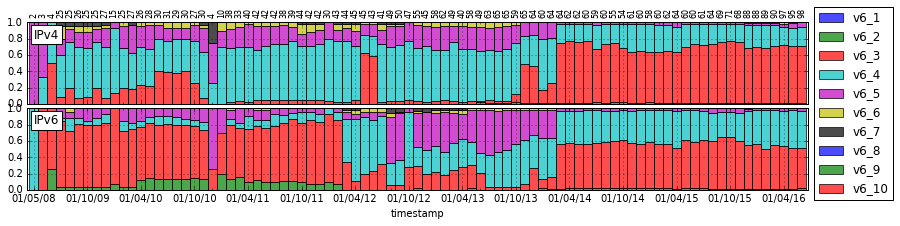

c-Root:


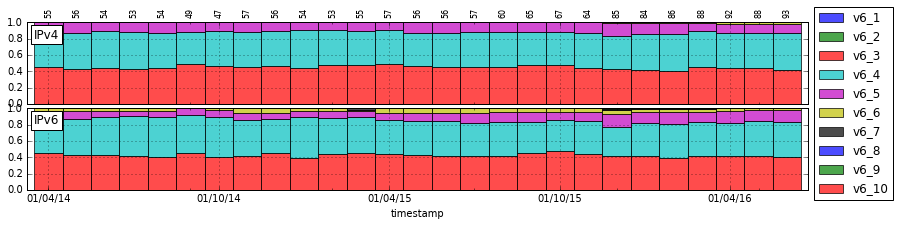

d-Root:


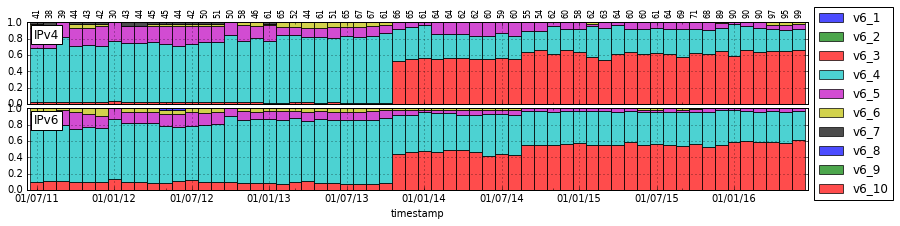

f-Root:


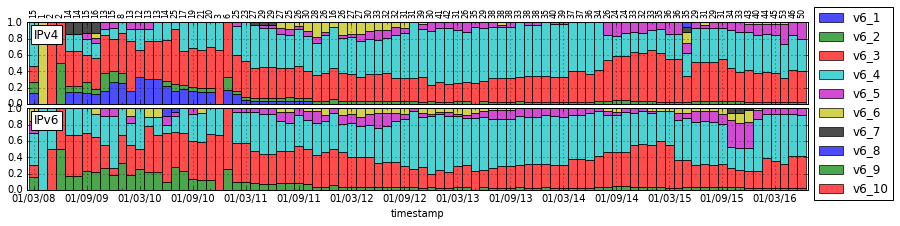

i-Root:


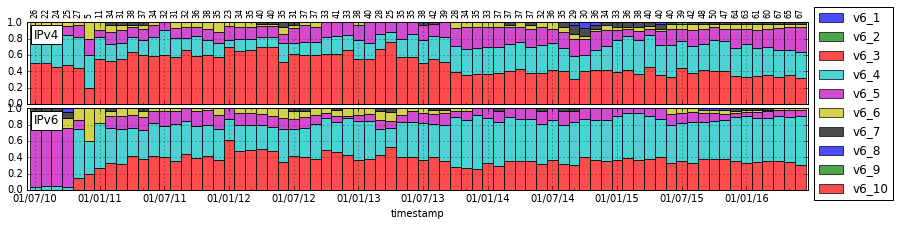

j-Root:


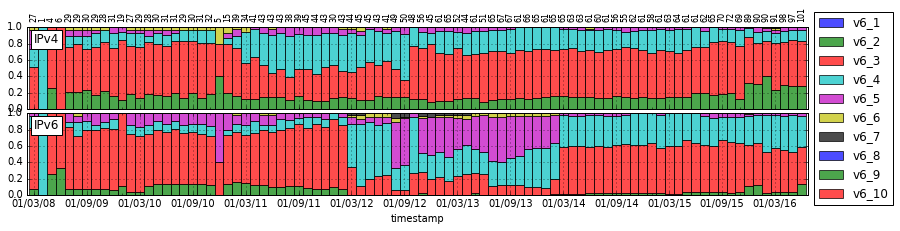

k-Root:


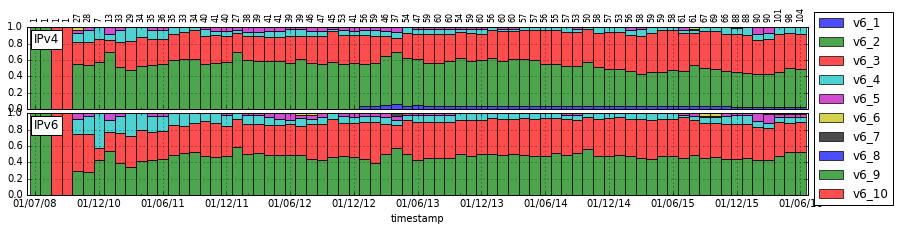

l-Root:


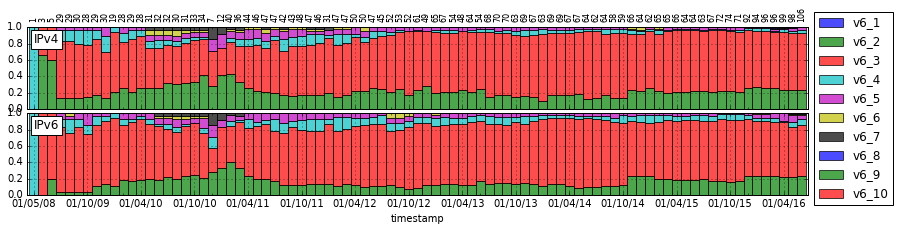

m-Root:


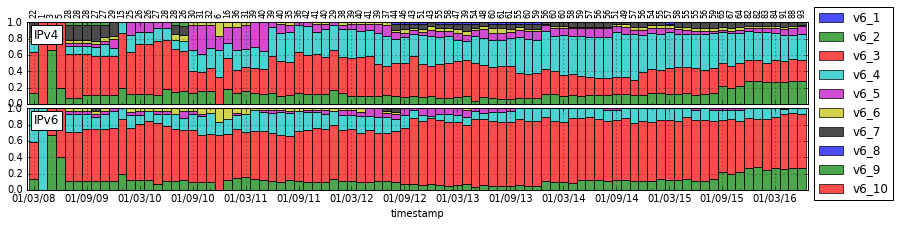

In [22]:
root_list = 'acdfijklm'
# root_list = 'a'

reducer = Code("""
    function(obj, prev) {
        if(obj.path4.length == 1) { prev.v4_1++;} 
        else if(obj.path4.length == 2) {prev.v4_2++;}
        else if(obj.path4.length == 3) {prev.v4_3++;}
        else if(obj.path4.length == 4) {prev.v4_4++;}
        else if(obj.path4.length == 5) {prev.v4_5++;}
        else if(obj.path4.length == 6) {prev.v4_6++;}
        else if(obj.path4.length == 7) {prev.v4_7++;}    
        else if(obj.path4.length == 8) {prev.v4_8++;}
        else if(obj.path4.length == 9) {prev.v4_9++;}
        else if(obj.path4.length == 10) {prev.v4_10++;}
        
        if(obj.path6.length == 1) {prev.v4_1++;}
        else if(obj.path6.length == 2) {prev.v6_2++;}
        else if(obj.path6.length == 3) {prev.v6_3++;}
        else if(obj.path6.length == 4) {prev.v6_4++;}
        else if(obj.path6.length == 5) {prev.v6_5++;}
        else if(obj.path6.length == 6) {prev.v6_6++;}
        else if(obj.path6.length == 7) {prev.v6_7++;}
        else if(obj.path6.length == 8) {prev.v6_8++;}
        else if(obj.path6.length == 9) {prev.v6_9++;}
        else if(obj.path6.length == 10) {prev.v6_10++;}
    }
""")

def format_date(dt):
    try:
        dt = dt.split(' ')[0]
        year, month, day = dt.split('-')
        returned = day + '/' + month + '/' + year[2:]
    except ValueError:
        returned = dt
        print('error: {}'.format(dt))
    return returned

container = {}

print('working.. ')
for index, root in enumerate(root_list):
    print('{}-Root:'.format(root))
    fig, axes = plt.subplots(nrows=2, ncols=1, sharey=True, sharex=True)
    coll = anycast['{}_root'.format(root)]
    res = coll.group(key={'timestamp':1}, 
                 condition={}, 
                 initial={'v4_1': 0, 'v4_2': 0, 'v4_3': 0, 'v4_4': 0, 'v4_5': 0, 'v4_6': 0, 'v4_7': 0, 'v4_8': 0, 'v4_9': 0, 'v4_10': 0,
                          'v6_1': 0, 'v6_2': 0, 'v6_3': 0, 'v6_4': 0, 'v6_5': 0, 'v6_6': 0, 'v6_7': 0, 'v6_8': 0, 'v6_9': 0, 'v6_10': 0}, 
                 reduce=reducer)
    
    # normalise the timestamp
    container[root] = DataFrame(res)
    container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
    container[root] = container[root].set_index(['timestamp'])
    # insert dummy data to fill in time-gap
#     if container[root].index[0] > pd.datetime(2008,3,1):
#         temp_range = pd.date_range(pd.datetime(2008,2,1), container[root].index[0], freq='MS')
#         temp = DataFrame(0, index=temp_range, columns=['identical', 'ipv4_shorter', 'ipv6_shorter', 'different_path'])
#         container[root] = temp.append(container[root])
    
    # set timestamp as index
#     container[root].sort_index()
    
    for item in container[root].iterrows():
        total4 = item[1]['v4_1'] + item[1]['v4_2'] + item[1]['v4_3'] + item[1]['v4_4'] + item[1]['v4_5'] + item[1]['v4_6'] + item[1]['v4_7'] + item[1]['v4_8'] + item[1]['v4_9'] + item[1]['v4_10']
        total6 = item[1]['v6_1'] + item[1]['v6_2'] + item[1]['v6_3'] + item[1]['v6_4'] + item[1]['v6_5'] + item[1]['v6_6'] + item[1]['v6_7'] + item[1]['v6_8'] + item[1]['v6_9'] + item[1]['v6_10']
        
        for i in range(1, 11):
            item[1]['v4_{}'.format(i)] = item[1]['v4_{}'.format(i)] / total4
            item[1]['v6_{}'.format(i)] = item[1]['v6_{}'.format(i)] / total6
        
    data4 = container[root][['v4_1', 'v4_2', 'v4_3', 'v4_4', 'v4_5', 'v4_6', 'v4_7', 'v4_8', 'v4_9', 'v4_10']]
    data6 = container[root][['v6_1', 'v6_2', 'v6_3', 'v6_4', 'v6_5', 'v6_6', 'v6_7', 'v6_8', 'v6_9', 'v6_10']]
    
    # plot
    bars4 = data4.plot.bar(stacked=True, 
                             ax=axes[0], 
                             figsize=(14,3), 
                             width=1.0,
                             alpha=0.7,
#                              xlim=(pd.Timestamp('2008-03-1'), pd.Timestamp('2016-06-01')),
                             ylim=(0,1))
    bars6 = data6.plot.bar(stacked=True, 
                             ax=axes[1], 
                             figsize=(14,3), 
                             width=1.0,
                             alpha=0.7,
#                              xlim=(pd.Timestamp('2008-03-1'), pd.Timestamp('2016-06-01')),
                             ylim=(0,1))

    # display total of peers at the top of bins
    temp_set = set()
    for bar in bars4.patches:
        temp_set.add(bar.get_x())
    temp_list = sorted(list(temp_set)) 
    
    for idx, item in enumerate(res):
        total = item['v4_1'] + item['v4_2'] + item['v4_3'] + item['v4_4'] + item['v4_5'] + item['v4_6'] + item['v4_7'] + item['v4_8'] + item['v4_9'] + item['v4_10']
        axes[0].text(temp_list[idx] + 0.5, 
                         1.065, 
                         int(total), 
                         horizontalalignment='center', 
                         verticalalignment='bottom',
                         rotation=90,
                         fontsize=8)
    
    n = 6

    axes[0].text(0.025, 0.85, 'IPv4', fontsize=12, bbox={'facecolor':'white', 'pad':3}, horizontalalignment='center', verticalalignment='center', transform= axes[0].transAxes)
    axes[0].grid(True)
    axes[0].legend().set_visible(False)

    ticks = axes[1].xaxis.get_ticklocs()
#     ticklabels = [l.get_text().split(' ')[0] for l in axes[1].xaxis.get_ticklabels()]
    ticklabels = [format_date(l.get_text()) for l in axes[1].xaxis.get_ticklabels()]
    axes[1].xaxis.set_ticks(ticks[::n])
    axes[1].text(0.025, 0.85, 'IPv6', fontsize=12, bbox={'facecolor':'white', 'pad':3}, horizontalalignment='center', verticalalignment='center', transform= axes[1].transAxes)
    axes[1].xaxis.set_ticklabels(ticklabels[::n], rotation=0)

    axes[1].grid(True)
    axes[1].legend().set_visible(False)

    # legend
    # read this: http://matplotlib.org/users/legend_guide.html#proxy-legend-handles
    plt.legend(bbox_to_anchor=(0.99, 1),
               bbox_transform=plt.gcf().transFigure,
               ncol=1
               )
#     plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.055)
    plt.show()


## Peers with different paths

working.. 
a-Root:


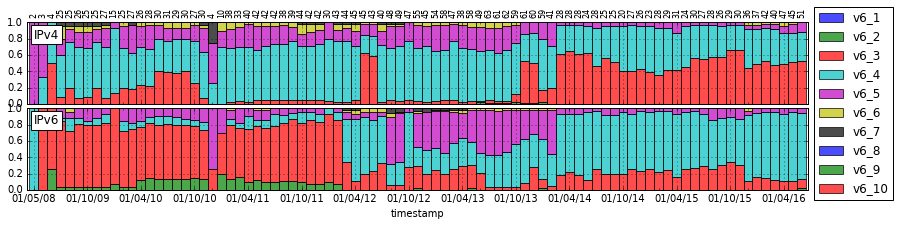

c-Root:


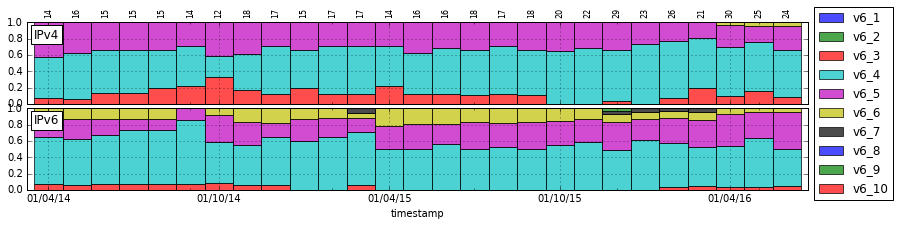

d-Root:


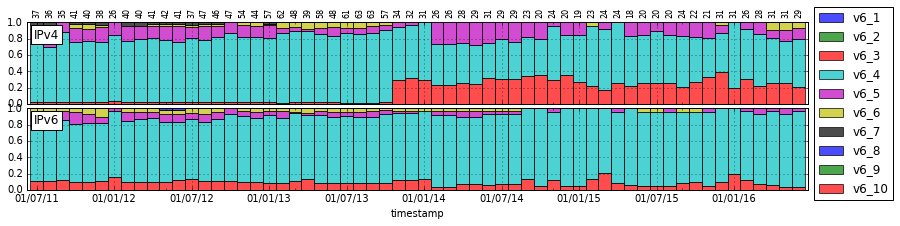

f-Root:


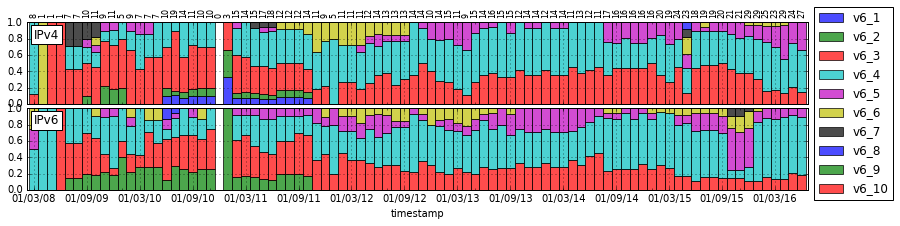

i-Root:


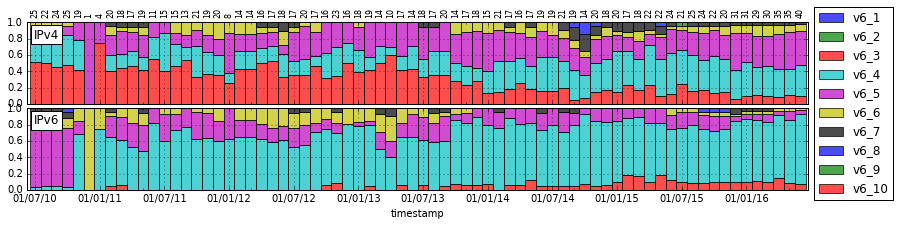

j-Root:


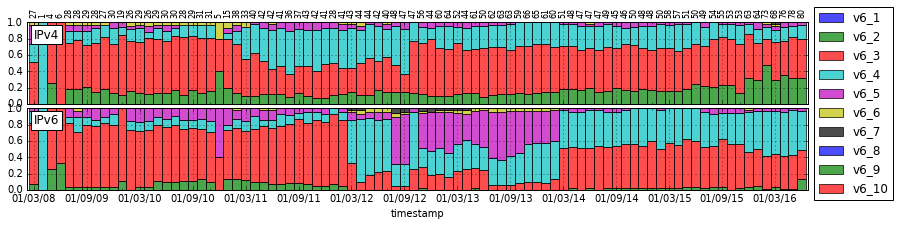

k-Root:


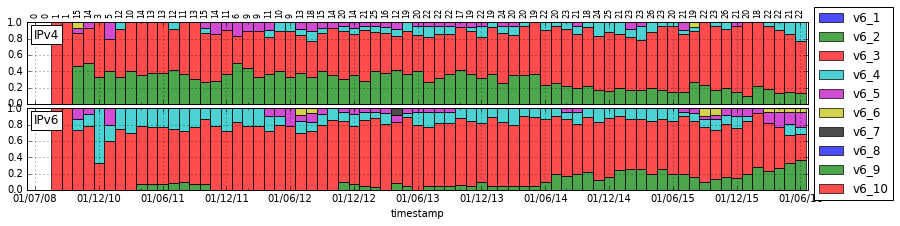

l-Root:


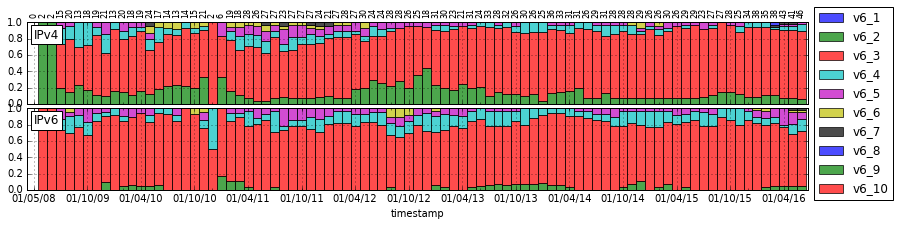

m-Root:


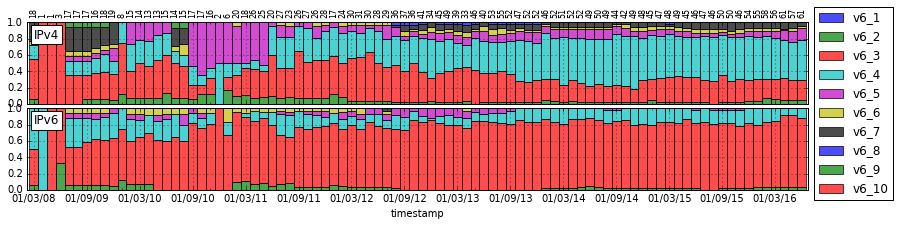

In [24]:
root_list = 'acdfijklm'
# root_list = 'acd'

reducer = Code("""
    function(obj, prev) {
        if(obj.path4.toString() != obj.path6.toString()) {
            if(obj.path4.length == 1) { prev.v4_1++;} 
            else if(obj.path4.length == 2) {prev.v4_2++;}
            else if(obj.path4.length == 3) {prev.v4_3++;}
            else if(obj.path4.length == 4) {prev.v4_4++;}
            else if(obj.path4.length == 5) {prev.v4_5++;}
            else if(obj.path4.length == 6) {prev.v4_6++;}
            else if(obj.path4.length == 7) {prev.v4_7++;}    
            else if(obj.path4.length == 8) {prev.v4_8++;}
            else if(obj.path4.length == 9) {prev.v4_9++;}
            else if(obj.path4.length == 10) {prev.v4_10++;}

            if(obj.path6.length == 1) {prev.v4_1++;}
            else if(obj.path6.length == 2) {prev.v6_2++;}
            else if(obj.path6.length == 3) {prev.v6_3++;}
            else if(obj.path6.length == 4) {prev.v6_4++;}
            else if(obj.path6.length == 5) {prev.v6_5++;}
            else if(obj.path6.length == 6) {prev.v6_6++;}
            else if(obj.path6.length == 7) {prev.v6_7++;}
            else if(obj.path6.length == 8) {prev.v6_8++;}
            else if(obj.path6.length == 9) {prev.v6_9++;}
            else if(obj.path6.length == 10) {prev.v6_10++;}
        }
    }
""")

def format_date(dt):
    try:
        dt = dt.split(' ')[0]
        year, month, day = dt.split('-')
        returned = day + '/' + month + '/' + year[2:]
    except ValueError:
        returned = dt
        print('error: {}'.format(dt))
    return returned

container = {}

print('working.. ')
for index, root in enumerate(root_list):
    fig, axes = plt.subplots(nrows=2, ncols=1, sharey=True, sharex=True)
    coll = anycast['{}_root'.format(root)]
    res = coll.group(key={'timestamp':1}, 
                 condition={}, 
                 initial={'v4_1': 0, 'v4_2': 0, 'v4_3': 0, 'v4_4': 0, 'v4_5': 0, 'v4_6': 0, 'v4_7': 0, 'v4_8': 0, 'v4_9': 0, 'v4_10': 0,
                          'v6_1': 0, 'v6_2': 0, 'v6_3': 0, 'v6_4': 0, 'v6_5': 0, 'v6_6': 0, 'v6_7': 0, 'v6_8': 0, 'v6_9': 0, 'v6_10': 0}, 
                 reduce=reducer)
    
    # normalise the timestamp
    container[root] = DataFrame(res)
    container[root]['timestamp'] = pd.to_datetime(container[root]['timestamp'] * 1000000000)
    container[root] = container[root].set_index(['timestamp'])
    # insert dummy data to fill in time-gap
#     if container[root].index[0] > pd.datetime(2008,3,1):
#         temp_range = pd.date_range(pd.datetime(2008,2,1), container[root].index[0], freq='MS')
#         temp = DataFrame(0, index=temp_range, columns=['identical', 'ipv4_shorter', 'ipv6_shorter', 'different_path'])
#         container[root] = temp.append(container[root])
    
    # set timestamp as index
#     container[root].sort_index()
    
    for item in container[root].iterrows():
        total4 = item[1]['v4_1'] + item[1]['v4_2'] + item[1]['v4_3'] + item[1]['v4_4'] + item[1]['v4_5'] + item[1]['v4_6'] + item[1]['v4_7'] + item[1]['v4_8'] + item[1]['v4_9'] + item[1]['v4_10']
        total6 = item[1]['v6_1'] + item[1]['v6_2'] + item[1]['v6_3'] + item[1]['v6_4'] + item[1]['v6_5'] + item[1]['v6_6'] + item[1]['v6_7'] + item[1]['v6_8'] + item[1]['v6_9'] + item[1]['v6_10']
        
        for i in range(1, 11):
            item[1]['v4_{}'.format(i)] = item[1]['v4_{}'.format(i)] / total4
            item[1]['v6_{}'.format(i)] = item[1]['v6_{}'.format(i)] / total6
        
    data4 = container[root][['v4_1', 'v4_2', 'v4_3', 'v4_4', 'v4_5', 'v4_6', 'v4_7', 'v4_8', 'v4_9', 'v4_10']]
    data6 = container[root][['v6_1', 'v6_2', 'v6_3', 'v6_4', 'v6_5', 'v6_6', 'v6_7', 'v6_8', 'v6_9', 'v6_10']]
    
    # plot
    bars4 = data4.plot.bar(stacked=True, 
                             ax=axes[0], 
                             figsize=(14,3), 
                             width=1.0,
                             alpha=0.7,
#                              xlim=(pd.Timestamp('2008-03-1'), pd.Timestamp('2016-06-01')),
                             ylim=(0,1))
    bars6 = data6.plot.bar(stacked=True, 
                             ax=axes[1], 
                             figsize=(14,3), 
                             width=1.0,
                             alpha=0.7,
#                              xlim=(pd.Timestamp('2008-03-1'), pd.Timestamp('2016-06-01')),
                             ylim=(0,1))

    # display total of peers at the top of bins
    temp_set = set()
    for bar in bars4.patches:
        temp_set.add(bar.get_x())
    temp_list = sorted(list(temp_set)) 
    
    for idx, item in enumerate(res):
        total = item['v4_1'] + item['v4_2'] + item['v4_3'] + item['v4_4'] + item['v4_5'] + item['v4_6'] + item['v4_7'] + item['v4_8'] + item['v4_9'] + item['v4_10']
        axes[0].text(temp_list[idx] + 0.5, 
                         1.065, 
                         int(total), 
                         horizontalalignment='center', 
                         verticalalignment='bottom',
                         rotation=90,
                         fontsize=8)
    
    n = 6

    axes[0].text(0.025, 0.85, 'IPv4', fontsize=12, bbox={'facecolor':'white', 'pad':3}, horizontalalignment='center', verticalalignment='center', transform= axes[0].transAxes)
    axes[0].grid(True)
    axes[0].legend().set_visible(False)

    ticks = axes[1].xaxis.get_ticklocs()
#     ticklabels = [l.get_text().split(' ')[0] for l in axes[1].xaxis.get_ticklabels()]
    ticklabels = [format_date(l.get_text()) for l in axes[1].xaxis.get_ticklabels()]
    axes[1].xaxis.set_ticks(ticks[::n])
    axes[1].text(0.025, 0.85, 'IPv6', fontsize=12, bbox={'facecolor':'white', 'pad':3}, horizontalalignment='center', verticalalignment='center', transform= axes[1].transAxes)
    axes[1].xaxis.set_ticklabels(ticklabels[::n], rotation=0)

    axes[1].grid(True)
    axes[1].legend().set_visible(False)

    # legend
    # read this: http://matplotlib.org/users/legend_guide.html#proxy-legend-handles
#     plt.legend(loc='lower center',
#                bbox_to_anchor=(0.1, -0.017, 0.8, 0.6),
#                bbox_transform=plt.gcf().transFigure,
#                ncol=10,
#                mode='expand'
#                )
    plt.legend(bbox_to_anchor=(0.99, 1),
               bbox_transform=plt.gcf().transFigure,
               ncol=1)

    print('{}-Root:'.format(root))
    # plt.locator_params(axis='x',nbins=10)
#     plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.055)
    plt.show()
